In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

sns.set_theme(style="whitegrid")
np.random.seed(42)

### 🔍 **Resumen de análisis según tipo de variables**

| Tipo de Relación         | Gráficos sugeridos       | Pruebas estadísticas           |
|--------------------------|---------------------------|----------------------------------|
| **Continua - Continua**  | `scatterplot`             | Correlación de Pearson / Spearman |
| **Categórica - Categórica** | `countplot`, `heatmap`  | Chi-cuadrado / Cramér’s V        |
| **Categórica - Continua**| `boxplot`, `violinplot`   | ANOVA / t-test / Welch test      |



In [2]:
# Datos de preferencia de bebida por género
tips = sns.load_dataset('tips')

display(tips)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### **Prueba ANOVA**

Sun:  [16.99 10.34 21.01 23.68 24.59 25.29  8.77 26.88 15.04 14.78]
Sat:  [20.65 17.92 20.29 15.77 39.42 19.82 17.81 13.37 12.69 21.7 ]
Thur:  [27.2  22.76 17.29 19.44 16.66 10.07 32.68 15.98 34.83 13.03]
Fri:  [28.97 22.49  5.75 16.32 22.75 40.17 27.28 12.03 21.01 12.46]
🎓 ANOVA Test: Total Bill by Day
F-statistic = 2.77
p-value = 0.0425
✅ Hay diferencias significativas en el total de la cuenta entre los días de la semana.



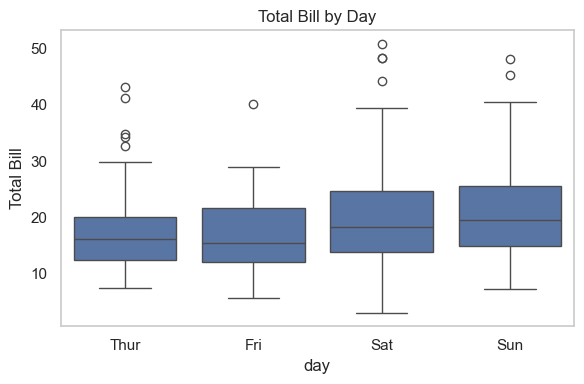

In [3]:
# Datos de ingreso por nivel educativo
day_data = [tips[tips['day'] == day]['total_bill'] for day in tips['day'].unique()]

for day, bills in zip(tips['day'].unique(), day_data):
    print(f'{day}: ', bills.values[:10])

# Prueba ANOVA
f_stat, p_anova = f_oneway(*day_data)

# Mostrar resultados
print('🎓 ANOVA Test: Total Bill by Day')
print(f'F-statistic = {f_stat:.2f}')
print(f'p-value = {p_anova:.4f}')

if p_anova < 0.05:
    print('✅ Hay diferencias significativas en el total de la cuenta entre los días de la semana.\n')
else:
    print('❌ No se encontraron diferencias significativas entre los días de la semana en cuanto al total de la cuenta.\n')

# Gráfico de boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(data=tips, x='day', y='total_bill')
plt.title('Total Bill by Day')
plt.ylabel('Total Bill')
plt.grid(False)
plt.tight_layout()
plt.show()

In [4]:
summary_table = tips.groupby('day', observed=False)['total_bill'].agg(
    count='count',
    mean='mean',
    std='std',
    min='min',
    max='max'
).round(1).reset_index()

summary_table 

,day,count,mean,std,min,max
0,Thur,62,17.7,7.9,7.5,43.1
1,Fri,19,17.2,8.3,5.8,40.2
2,Sat,87,20.4,9.5,3.1,50.8
3,Sun,76,21.4,8.8,7.2,48.2


### **🧠 Insights clave**
1. 🔺 **Domingo** tiene el mayor gasto promedio ($21.41), seguido de sábado.
2. 🔻 **Viernes** tiene el menor gasto promedio ($17.15), además de tener la menor cantidad de observaciones (19), lo que hace que su resultado sea menos confiable estadísticamente.
3. 📉 **Jueves** tiene un gasto promedio similar al viernes, pero con más clientes.

### **🎯 ACCIONES RECOMENDADAS**

#### **💡 Promociones diferenciadas**

**Domingos y sábados**

Son días de mayor consumo, ideales para:
- Promocionar menús premium, platos más rentables.
- Potenciar combos de mayor ticket promedio.

**Viernes y jueves**

Días de gasto menor, útiles para:
- Campañas de atracción (happy hour, 2x1, descuentos).
- Aumentar tráfico y ticket con promociones especiales.

#### **📊 Optimización de personal y recursos**
- Puedes asignar más personal y preparar más stock los fines de semana.
- Usar los datos para hacer forecasting de ventas por día.

🔍 ANOVA: Total Bill vs Smoker
F-statistic = 1.79
p-value = 0.1820
❌ No se encontró una diferencia significativa en el total de la cuenta entre los grupos.


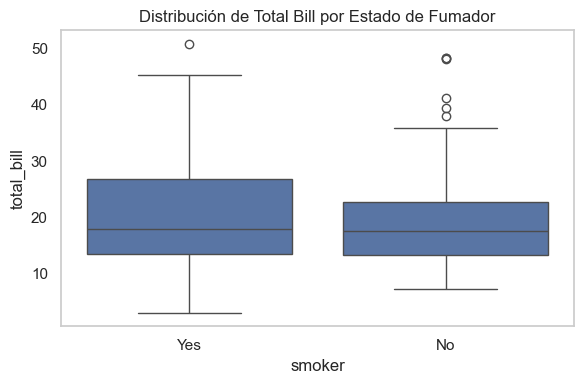

In [5]:
# Agrupar datos: total_bill según si es fumador o no
smoker_groups = [tips[tips['smoker'] == status]['total_bill'] for status in tips['smoker'].unique()]

# Aplicar ANOVA
f_stat, p_value = f_oneway(*smoker_groups)

# Mostrar resultados
print('🔍 ANOVA: Total Bill vs Smoker')
print(f'F-statistic = {f_stat:.2f}')
print(f'p-value = {p_value:.4f}')

# Interpretación automática
if p_value < 0.05:
    print('✅ Hay una diferencia significativa en el total de la cuenta entre fumadores y no fumadores.')
else:
    print('❌ No se encontró una diferencia significativa en el total de la cuenta entre los grupos.')

# Visualización
plt.figure(figsize=(6, 4))
sns.boxplot(data=tips, x='smoker', y='total_bill')
plt.title('Distribución de Total Bill por Estado de Fumador')
plt.grid(False)
plt.tight_layout()
plt.show()

🔍 ANOVA: Total Bill vs Sex
F-statistic = 5.19
p-value = 0.0236
✅ Hay una diferencia significativa en el monto de la cuenta entre hombres y mujeres.


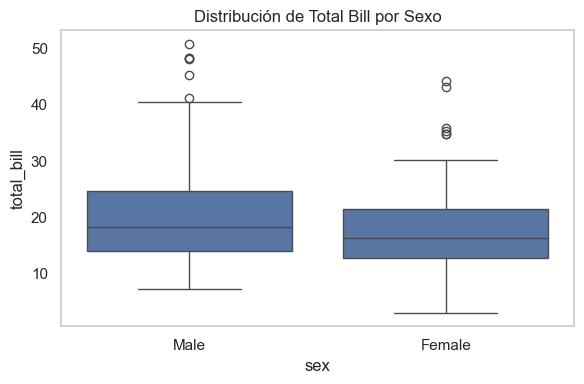

In [6]:
grouped_data = [tips[tips['sex'] == gender]['total_bill'] for gender in tips['sex'].unique()]

# Aplicar prueba ANOVA
f_stat, p_value = f_oneway(*grouped_data)

# Resultados
print('🔍 ANOVA: Total Bill vs Sex')
print(f'F-statistic = {f_stat:.2f}')
print(f'p-value = {p_value:.4f}')

# Interpretación automática
if p_value < 0.05:
    print('✅ Hay una diferencia significativa en el monto de la cuenta entre hombres y mujeres.')
else:
    print('❌ No se encontró diferencia significativa entre los grupos.')

# Visualización con boxplot (sin líneas de cuadrícula)
plt.figure(figsize=(6, 4))
sns.boxplot(data=tips, x='sex', y='total_bill')
plt.title('Distribución de Total Bill por Sexo')
plt.grid(False)
plt.tight_layout()
plt.show()